In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [3]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))


In [294]:
# https://www.kaggle.com/tunguz/deep-solar-dataset
df_all = pd.read_csv('deepsolar_tract.csv', encoding='latin-1')

Notes on the solar industry...

- Solar incentives have varied over the years and this dataset offers a snapshot of solar pannels that have accumulated until 2017(?). 

- solar installations require good credit and financial resources and/or ability to take on debt, unless there are state programs to support low income installation

- High solar radiation, is probably inversely related to high heating needs


typical high/low temperatures that HVAC systems should be designed for in your area
- The heating design temperature is temperature when the thermostat causes the heat pump system to start pumping heat into the area which is controlled by the thermostat. In the winter, the temperature should remain above this value 99% of the time. 

- The cooling design temp is the temperature when the thermostat causes the heat pump system to start pumping heat out of the area which is controlled by the thermostat. In the summer, the temperature should remain below this value 99% of the time. 

- The Cooling Design Day is effectively the "worst case"  day for your air conditioning loads. The "worst case" hour of this day determines equipment capacity, fan sizes, and subsequently duct sizes. This largely impacts first cost. The Design Hour also impacts peak KW demand which often has a huge impact on the utility bill.



Check:
- high heating with fuel and 

In [5]:
for col in df_all.columns:
    try:
        pd.to_numeric(df_all[col])
    except:
        print(col)

county
state
electricity_price_transportation


In [295]:
# analyze the data that is removed
df_nans = df_all[pd.isnull(df_all).any(axis=1)]

In [327]:
grps = df_nans[df_nans['daily_solar_radiation'].isnull()].groupby('state')
# df_nans[df_nans['heating_degree_days'].isnull()]

for grp in grps:
    print(grp[0], len(grp[1]), 100*len(grp[1])/len(df_all[df_all.state == grp[0]]) )

al 1 0.0846740050804403
ar 111 16.18075801749271
ca 16 0.19860973187686196
ct 3 0.36014405762304924
dc 21 11.731843575418994
de 22 10.091743119266056
fl 33 0.7773851590106007
ga 3 0.15236160487557135
ia 211 25.575757575757574
il 2 0.06404098623118797
in 3 0.1985440105890139
ks 159 20.649350649350648
ky 268 24.03587443946188
la 258 22.473867595818817
ma 260 17.591339648173207
md 329 23.399715504978662
me 75 20.949720670391063
mi 201 7.14539637397796
mn 206 15.39611360239163
mo 172 12.347451543431443
ms 84 12.650602409638553
mt 26 9.59409594095941
nc 295 13.439635535307517
nd 27 13.170731707317072
ne 60 11.278195488721805
nh 36 12.203389830508474
nj 336 16.71641791044776
nv 162 23.580786026200872
ny 12 0.24400162667751119
oh 414 14.024390243902438
ok 130 12.4282982791587
or 117 14.028776978417266
pa 447 13.890615288999378
ri 37 15.163934426229508
sc 137 12.42067089755213
sd 26 11.711711711711711
tn 128 8.550434201736808
tx 481 9.135802469135802
ut 67 11.394557823129253
va 193 10.12060828

In [301]:
# df_nans.describe()

nans = df_nans.isna().sum()
nans.sort_values(ascending = False)

voting_2012_dem_percentage                 10554
voting_2012_gop_percentage                 10554
heating_degree_days                         5802
cooling_design_temperature                  5802
cooling_degree_days                         5802
earth_temperature                           5802
wind_speed                                  5802
atmospheric_pressure                        5802
daily_solar_radiation                       5802
relative_humidity                           5802
air_temperature                             5802
frost_days                                  5802
earth_temperature_amplitude                 5802
heating_design_temperature                  5802
elevation                                   5802
lon                                         5802
lat                                         5802
housing_unit_median_gross_rent              1976
housing_unit_median_value                   1894
mortgage_with_rate                          1136
dropout_16_19_inscho

In [6]:
df_all = df_all.dropna()

In [7]:
# df = df_all[df_all['total_panel_area_residential']>0]
df = df_all
# df = df[df.state != 'ca']
# df = df[[df.state in ['ca', 'nv', 'az', 'nm', 'tx']]]

In [277]:
df['solar_system_rate_residential'] = df['solar_system_count_residential'].div(df.land_area)
df['solar_system_rate_household'] = df['solar_system_count_residential'].div(df.household_count)
df['median_income_per_area_residential'] = df['median_household_income'].div(df.land_area)
df['income_per_area_residential'] = df['average_household_income']*df['household_count'].div(df.land_area)
df['household_density'] = df['household_count'].div(df.land_area)
df['education_higher_ed_rate'] = (df['education_bachelor'] + df['education_doctoral'] + df['education_master'] + df['education_professional_school']).div(df.education_population)


(array([ 38367.,  14305.,   1274.,    153.]),
 array([   4174.  ,   65630.75,  127087.5 ,  188544.25,  250001.  ]),
 <a list of 4 Patch objects>)

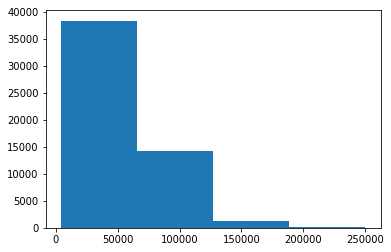

In [260]:
plt.hist(df['median_household_income'],4)

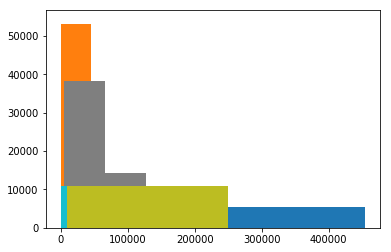

In [264]:
x = 10
n, bins_equl_n, patches = plt.hist(df.population_density, histedges_equalN(df.population_density, 10))
df['population_density_bin_equaln'] = pd.cut(df['population_density'],bins_equl_n, labels = [str(n) for n in range(len(bins_equl_n)-1)])

x = 10
n, bins_equl_width, patches = plt.hist(df.population_density, 10)
df['population_density_bin_equalwidth'] = pd.cut(df['population_density'],bins_equl_width)


df['solar_system_rate_residential'] = df['solar_system_count_residential'].div(df.land_area)
n, ssr_bins_equln, patches = plt.hist(df.solar_system_rate_residential, 4)
df['solar_system_rate_residential_equaln'] = pd.cut(df['solar_system_rate_residential'],ssr_bins_equln)

n, ssc_bins_equln, patches = plt.hist(df.solar_system_count_residential, 3)
ssc_bins_equln[0] = -1
df['solar_system_count_residential_bin'] = pd.cut(df['solar_system_count_residential'],ssc_bins_equln)


n, bins, patches = plt.hist(df['mortgage_with_rate'],5)
df['mortgage_with_rate_bin'] = pd.cut(df['mortgage_with_rate'],bins, labels = [n for n in range(len(bins)-1)])

n, incentive_bins_equl_n, patches = plt.hist(df.incentive_residential_state_level, histedges_equalN(df.incentive_residential_state_level, 4))
incentive_bins_equl_n[0] = 0
df['incentive_residential_state_level_bin'] = pd.cut(df['incentive_residential_state_level'],incentive_bins_equl_n, labels = [n for n in range(len(incentive_bins_equl_n)-1)])

n, solar_bins_equl_n, patches = plt.hist(df.daily_solar_radiation, histedges_equalN(df.daily_solar_radiation, 3))
df['daily_solar_radiation_bin'] = pd.cut(df['daily_solar_radiation'],solar_bins_equl_n)

n, median_household_income_bins, patches = plt.hist(df['median_household_income'],4)
n, median_household_income_bins_equl_n, patches = plt.hist(df.median_household_income, histedges_equalN(df.median_household_income, 5))
df['median_household_income_bin'] = pd.cut(df['median_household_income'],median_household_income_bins)#, labels = [n for n in range(len(median_household_income_bins)-1)])

# n, bins, patches = plt.hist(df['land_area'],10)
n, land_area_bins_equl_n, patches = plt.hist(df.land_area, histedges_equalN(df.land_area, 5))
df['land_area_bin'] = pd.cut(df['land_area'],land_area_bins_equl_n, labels = [n for n in range(len(land_area_bins_equl_n)-1)])

df['age_retired']= df.population*df.age_65_74_rate + df.population*df.age_75_84_rate + df.population*df.age_more_than_85_rate 
df['age_retired_rate'] = df['age_retired'].div(df.population)

In [180]:
grps = df.groupby('solar_system_count_residential_bin')#_bin')

tot = 0
for grp in grps:
    print(grp[0], len(grp[1]))
    tot+=len(grp[1])
tot, len(df)

(-1.0, 351.0] 53853
(351.0, 702.0] 215
(702.0, 1053.0] 27
(1053.0, 1404.0] 4


(54099, 54099)

In [90]:
set(df[df.rebate>0]['state'])

{'ca', 'de', 'md', 'nh', 'nj', 'ny', 'or'}

In [56]:
set(df[(df.daily_solar_radiation>4.5)]['state'])

{'al', 'az', 'ca', 'id', 'ks', 'la', 'nc', 'nm', 'nv', 'ok', 'or', 'tx'}

In [83]:
sum(df[df.voting_2016_dem_win== True]['solar_system_count_residential'])/sum(df[df.voting_2016_dem_win== False]['solar_system_count_residential'])
# districts that voted democrat in 2016 have collectively 3.1 times as many residential solar installations

3.189288851358519

In [82]:
sum(df[df.daily_solar_radiation>4.5]['solar_system_count_residential'])/sum(df[df.daily_solar_radiation<=4.5]['solar_system_count_residential'])
# districts that have more than 4.5 hours of daily solar radiation collectively have 3.2 times as many residential solar installations

3.2708600103824192

In [99]:
sum(df[(df.daily_solar_radiation<=4.5)& (df.voting_2016_dem_win== True)]['solar_system_count_residential'])/sum(df[(df.daily_solar_radiation<=4.5) & (df.voting_2016_dem_win== False)]['solar_system_count_residential'])
# districts that have less than or equal to 4.5 hours of daily solar radiation and voted dem in 2016 collectively have 1.4 times as many residential solar installations as the same daily solar radiation states that voted gop

1.4813224559896951

In [190]:
sum(df[(df.daily_solar_radiation>4.5)& (df.voting_2016_dem_win== True)]['solar_system_count_residential'])/sum(df[(df.daily_solar_radiation>4.5) & (df.voting_2016_dem_win== False)]['solar_system_count_residential'])
# districts that have less than or equal to 4.5 hours of daily solar radiation and voted dem in 2016 collectively have 4.3 times as many residential solar installations as the same daily solar radiation states that voted gop

4.305871537743595

In [101]:
sum(df[(df.daily_solar_radiation>4.5)& (df.voting_2016_dem_win== True) & (df.state != 'ca')]['solar_system_count_residential'])/sum(df[(df.daily_solar_radiation>4.5) & (df.voting_2016_dem_win== False) & (df.state != 'ca')]['solar_system_count_residential'])
# districts that have more than 4.5 hours of daily solar radiation and voted dem in 2016 and are not in CA collectively have .8 times as many residential solar installations as the same daily solar radiation states outside of CA that voted gop
# minimum income, 
# urbanicity, education, political

0.833131610798295

In [218]:
sum(df[(df.population_density<15000)& (df.population_density>1000) &(df.median_household_income>65000)]['solar_system_count_residential'])/sum(df['solar_system_count_residential'])
# districts that have more than 4.5 hours of daily solar radiation and voted dem in 2016 and are not in CA collectively have .8 times as many residential solar installations as the same daily solar radiation states outside of CA that voted gop
# minimum income, 
# urbanicity, education, political

0.48505953900321297

In [239]:
sum(df[(df.solar_system_count_residential<100)]['solar_system_count_residential'])/sum(df['solar_system_count_residential'])
# districts that have more than 4.5 hours of daily solar radiation and voted dem in 2016 and are not in CA collectively have .8 times as many residential solar installations as the same daily solar radiation states outside of CA that voted gop
# minimum income, 
# urbanicity, education, political

0.5013573028973353

In [ ]:
im = [sum(df[(df.median_household_income<ik)]['solar_system_count_residential'])/sum(df['solar_system_count_residential']) for ik in range(0,250000,1000)]

plt.scatter([ik for ik in range(0,250000,1000)], im)
plt.plot([ik for ik in range(0,250000,1000)], [.5 for ik in range(0,250000,1000)], c = 'k', alpha = .3)
plt.plot([ik for ik in range(0,250000,1000)], [.75 for ik in range(0,250000,1000)],  c = 'k', alpha = .3)
plt.plot([ik for ik in range(0,250000,1000)], [.25 for ik in range(0,250000,1000)],  c = 'k', alpha = .3)
plt.xlabel('Median Household Income')
plt.ylabel('% of residential solar systems accounted for')
# districts that have more than 4.5 hours of daily solar radiation and voted dem in 2016 and are not in CA collectively have .8 times as many residential solar installations as the same daily solar radiation states outside of CA that voted gop
# minimum income, 
# urbanicity, education, political

In [224]:
sum(df[(df.population_density<10000)& (df.median_household_income>65000)]['land_area'])/sum(df.land_area)

0.10695458954491109

In [250]:
sum(df[(df.solar_system_count_residential>410)]['land_area'])/sum(df.land_area)

0.0012141361703474768

In [246]:
sum(df['solar_system_count_residential'])/sum(df.household_count)

0.011304651596210136

In [237]:
grps = df[(df.solar_system_count_residential>410)].groupby('state')

for grp in grps:
    print(grp[0], len(grp[1]))

az 11
ca 153
nj 1
nv 1


In [285]:
# percent of solar systems installed in each state
for state in set(df.state):
    print(state, sum(df[df.state == state].solar_system_count_residential)/sum(df.solar_system_count_residential))

ms 0.0007941234862021044
md 0.012391972870148656
ca 0.6253205868410497
tx 0.026996146880431744
ma 0.034004489228687304
ri 0.0012317017337012232
az 0.07772281038681107
nc 0.004386924513700656
wi 0.0026852313289818606
ky 0.0011972627049628667
oh 0.004631036452699007
de 0.002751070648628719
me 0.0004629010627479104
nh 0.0012286629958713682
pa 0.007979725541199207
il 0.0052762617852382164
mi 0.004342356358862783
sd 0.0002187891237495594
ar 0.0008700919319484792
mo 0.003926049276172649
nd 0.0002633572785874326
mn 0.002347931429867957
ne 0.0008457820293096392
id 0.0012681665876594832
nj 0.03523112639933877
la 0.015140004780947519
wa 0.010754093179856814
ia 0.0015284851284170606
vt 0.0005297532950047202
al 0.0016591508551008253
ny 0.05044507380081276
nm 0.01111570298160956
mt 0.0008052655249115728
ok 0.001234740471531078
wv 0.0005044304797559286
va 0.003100525499062043
nv 0.026235449510358045
tn 0.002006579880314246
in 0.002687257154201764
or 0.012664446362225653
ks 0.001214482219332045


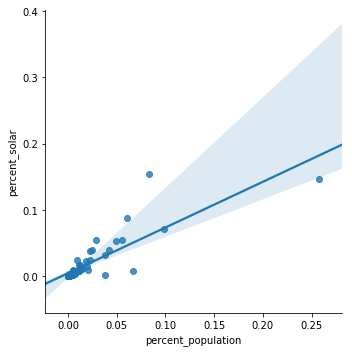

In [293]:
solar_perc = []
pop_perc = []
counties = []
# percent of solar systems installed in each state
for county in set(df[df.state == 'ca'].county):
    counties.append(county)
    solar_perc.append(sum(df[df.county == county].solar_system_count_residential)/sum(df[df.state == 'ca'].solar_system_count_residential))
    pop_perc.append(sum(df[df.county == county].population)/sum(df[df.state == 'ca'].population))
#     print(county, sum(df[df.county == county].solar_system_count_residential)/sum(df[df.state == 'ca'].solar_system_count_residential))

tmp_df = pd.DataFrame({'percent_population': pop_perc, 'percent_solar': solar_perc, 'county':counties})
sns.lmplot(x='percent_population', y='percent_solar', data =tmp_df)


/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


(0.55970149253731338, 'Santa Barbara County')

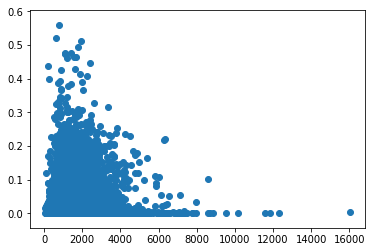

In [280]:
plt.scatter(df.household_count, df.solar_system_rate_household)
df.solar_system_rate_household[np.argmax(df.solar_system_rate_household)], df.county[np.argmax(df.solar_system_rate_household)]

0 nan
1 (65630.75, 127087.5]
2 (188544.25, 250001.0]
3 (127087.5, 188544.25]
4 (4174.0, 65630.75]


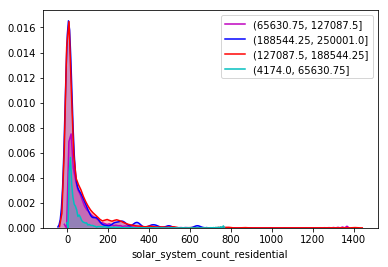

In [265]:
# sns.kdeplot('median_household_income', 'solar_system_rate_residential', data = df, col ='daily_solar_radiation_bin' )
clrs = ['g', 'm', 'b', 'r', 'c', 'k']
var = 'solar_system_count_residential'
fig, (ax1) = plt.subplots(ncols=1, sharey=True)
df_slice = df#[df.voting_2012_dem_win == False]#[df.daily_solar_radiation>4.5]#[]#df[(df.voting_2016_gop_percentage>.50) & (df.daily_solar_radiation>4.5)]# df[(df.daily_solar_radiation>=4.5)]#[(df.incentive_residential_state_level_bin==3)]#df[df.median_household_income>65000] (df.race_asian_rate>.06) &
df_slice2 = df#[df.voting_2012_dem_win == True]#[df.daily_solar_radiation<=4.5]#[df.voting_2012_dem_win == True]#[(df.incentive_residential_state_level_bin==3)]#df[df.median_household_income>65000] (df.race_asian_rate>.06) &
for bn_ind, bn in enumerate(list(set(df_slice.median_household_income_bin))):
    print(bn_ind, bn)
    sns.kdeplot(df_slice[(df_slice.median_household_income_bin == bn)][var], shade=True, color=clrs[bn_ind], label = bn, ax = ax1)
    #sns.kdeplot(df_slice2[(df_slice2.solar_system_count_residential_bin == bn)][var], shade=True, color=clrs[bn_ind], label = bn, ax = ax2)


ax1.set_xlabel(var)
# ax1.set_xlim([-100, 1000])
#solar_system_rate_residential_equaln
#solar_system_count_residential_bin
#incentive_residential_state_level_bin
# ax.set_xlim([-1000, 10000])

In [254]:
df.median_household_income.mean()

57481.425017098285

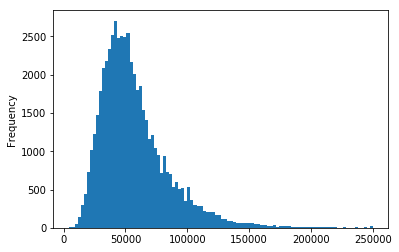

In [253]:
df.median_household_income.plot.hist(bins=100)

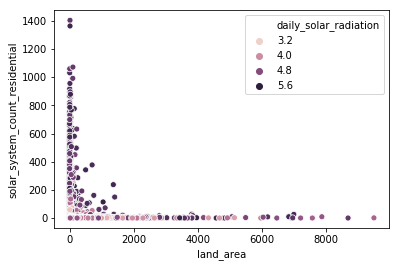

In [222]:
sns.scatterplot(x=df['land_area'], y=df['solar_system_count_residential'], hue = df['daily_solar_radiation'])

In [165]:
features = ['poverty_family_count','household_count','population_density','incentive_count_residential','incentive_count_nonresidential', 'rebate','solar_system_count_residential', 'solar_system_count', 'total_panel_area_residential']

for feature in features: 
    print(feature, df['county'][df[feature].argmax()], df['state'][df[feature].argmax()], df[feature][df[feature].argmax()])
                                                                   

poverty_family_count Fort Bend County tx 13949
household_count Fort Bend County tx 16023
population_density Cook County il 454706.9
incentive_count_residential Los Angeles County ca 75
incentive_count_nonresidential Los Angeles County ca 85
rebate Multnomah County or 14
solar_system_count_residential San Diego County ca 1404.0
solar_system_count Tulare County ca 1535.0
total_panel_area_residential Tulare County ca 40380.0998507


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.


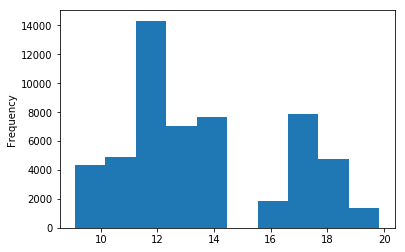

In [391]:
df.electricity_price_residential.plot.hist()

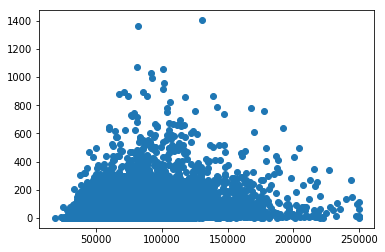

In [390]:
plt.scatter(df[(df.occupancy_owner_rate>.5) & (df.electricity_price_residential>15)].median_household_income, df[(df.occupancy_owner_rate>.5) & (df.electricity_price_residential>15)].solar_system_count_residential)

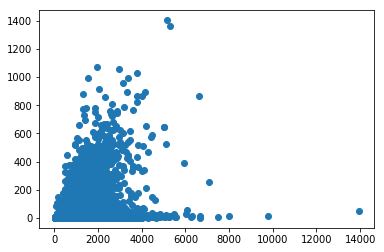

In [156]:
plt.scatter(df.poverty_family_count, df.solar_system_count_residential)

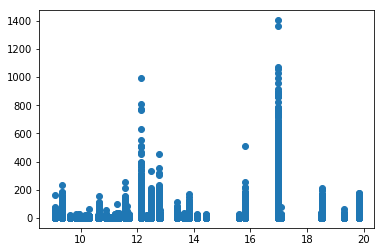

In [157]:
plt.scatter(df.electricity_price_residential, df.solar_system_count_residential)

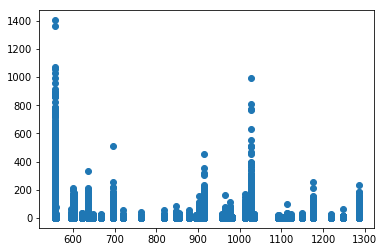

In [158]:
plt.scatter(df.electricity_consume_residential, df.solar_system_count_residential)

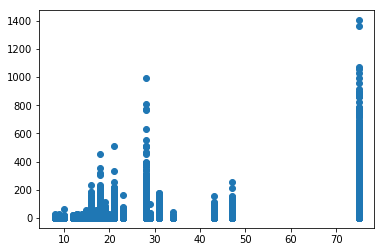

In [159]:
plt.scatter(df.incentive_count_residential, df.solar_system_count_residential)

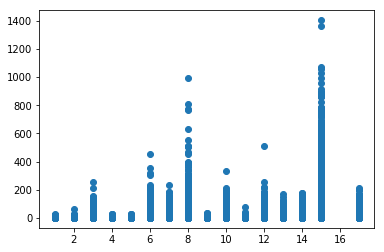

In [160]:
plt.scatter(df.incentive_residential_state_level, df.solar_system_count_residential)

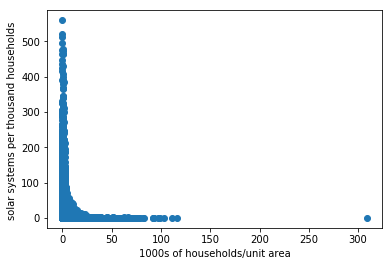

In [161]:
plt.scatter( df.household_count.div(df.total_area)*1/1000, df.number_of_solar_system_per_household*1000)
plt.xlabel('1000s of households/unit area')
plt.ylabel('solar systems per thousand households ')

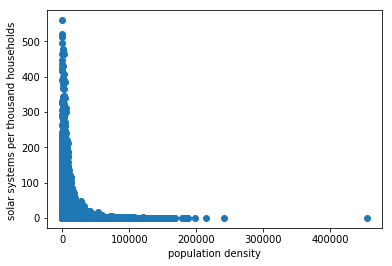

In [162]:
plt.scatter( df.population_density, df.number_of_solar_system_per_household*1000)
plt.xlabel('population density')
plt.ylabel('solar systems per thousand households ')

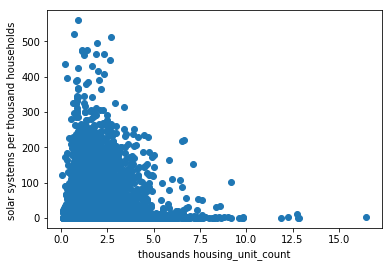

In [166]:
plt.scatter( df.housing_unit_count/1000, df.number_of_solar_system_per_household*1000)
plt.xlabel('thousands housing_unit_count')
plt.ylabel('solar systems per thousand households ')

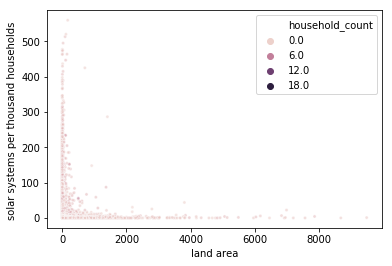

In [167]:
kwargs = {'alpha': .5}
sns.scatterplot( x = df.land_area,y = df['solar_system_count_residential'].div(df.household_count/1000), **kwargs, s=10,hue = df.household_count/1000)
plt.xlabel('land area')
plt.ylabel('solar systems per thousand households ')

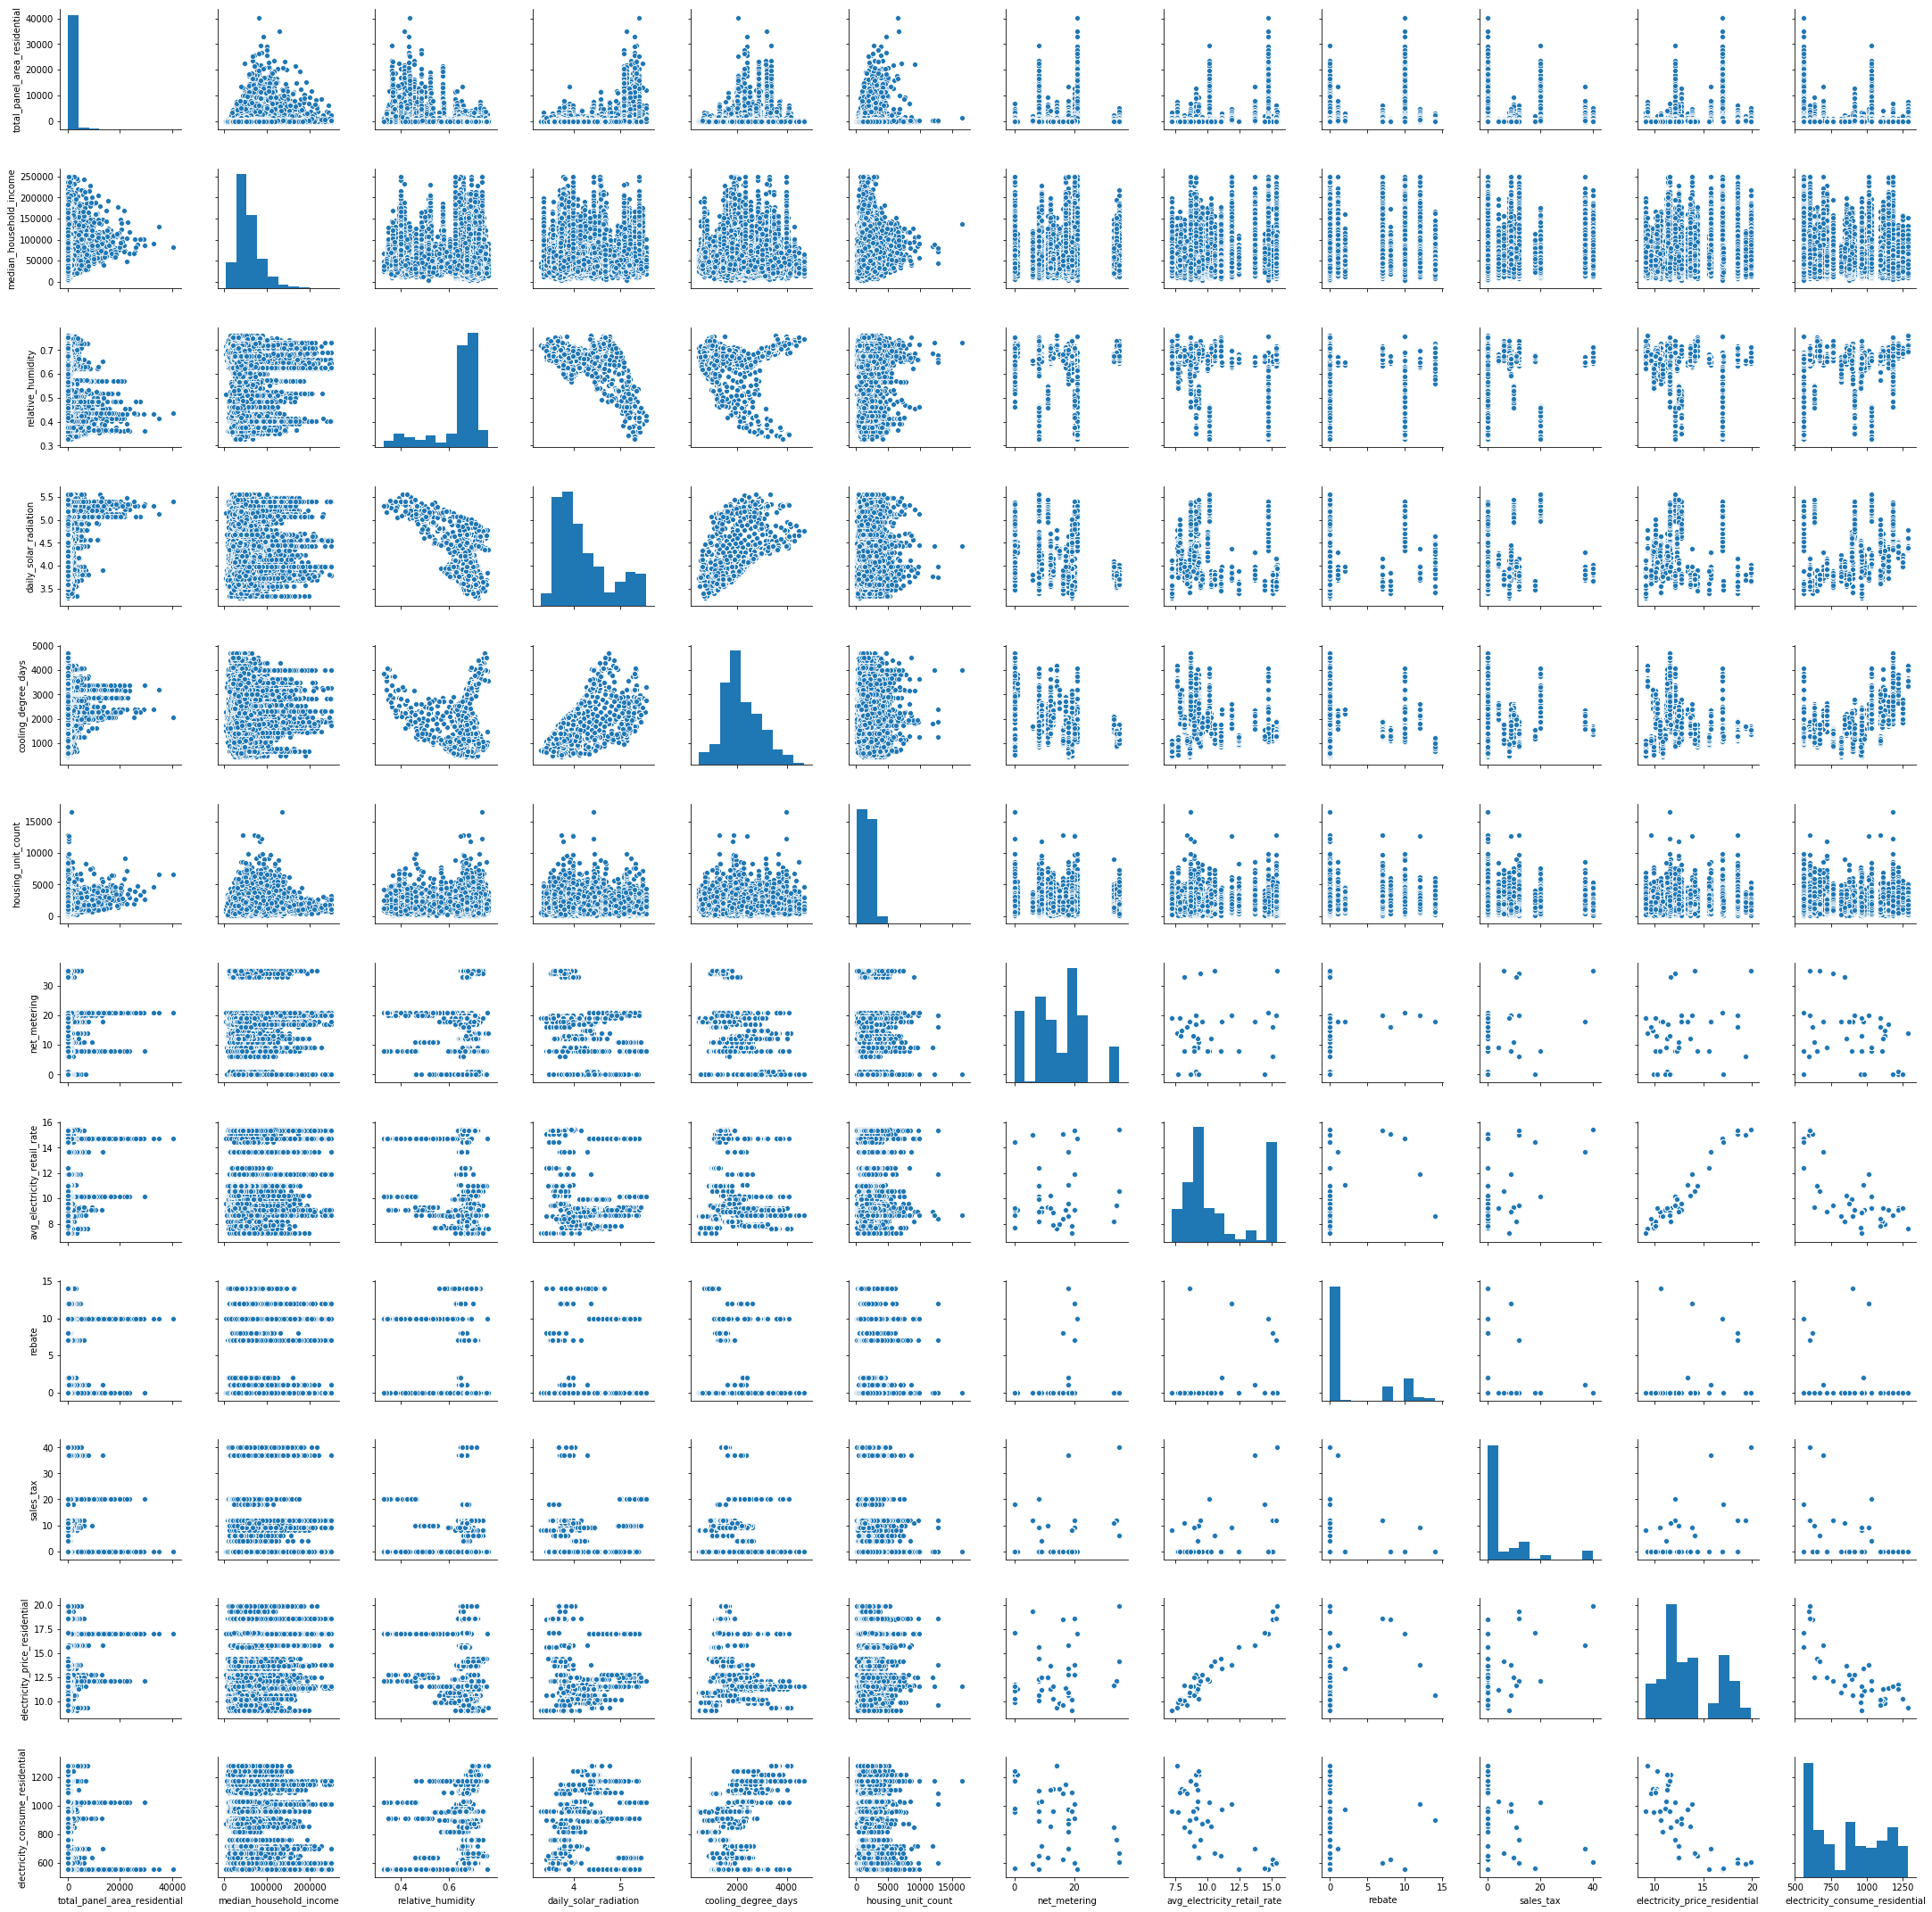

In [172]:

feat_list = ['total_panel_area_residential','median_household_income','relative_humidity','daily_solar_radiation','cooling_degree_days','housing_unit_count', 'net_metering','avg_electricity_retail_rate','rebate','sales_tax', 'electricity_price_residential','electricity_consume_residential']
sns.pairplot(df[feat_list])

# g = sns.PairGrid(df, diag_sharey=False)
# g.map_lower(sns.kdeplot)
# g.map_upper(sns.scatterplot)
# g.map_diag(sns.kdeplot, lw=3)

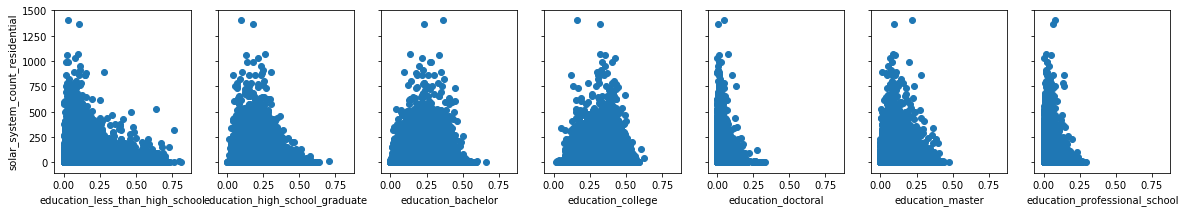

In [175]:
feats = ['education_less_than_high_school','education_high_school_graduate','education_bachelor','education_college','education_doctoral',
'education_master','education_professional_school']

f, ax = plt.subplots(1, len(feats), sharey=True, sharex = True, figsize = (20,3))
for ind, var in enumerate(feats):
#     print(ind, var)
#     ax.subplot(1,len(feats), ind+1)
    ax[ind].scatter(df[var].div(df.education_population), df['solar_system_count_residential'])
    ax[ind].set_xlabel(var)
ax[0].set_ylabel('solar_system_count_residential')

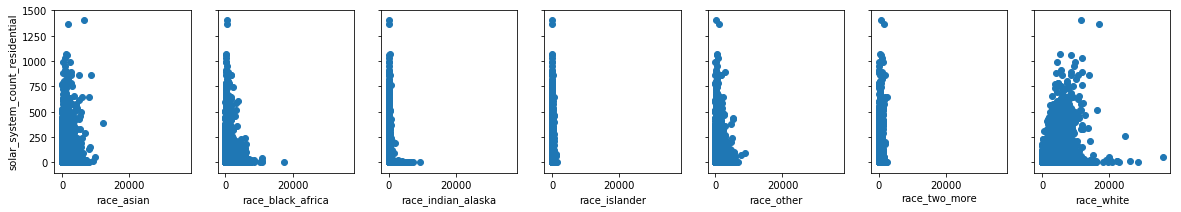

In [176]:
feats = ['race_asian',
'race_black_africa',
'race_indian_alaska',
'race_islander',
'race_other',
'race_two_more','race_white']

f, ax = plt.subplots(1, len(feats), sharey=True, sharex = True, figsize = (20,3))
for ind, var in enumerate(feats):
#     ax.subplot(1,len(feats), ind+1)
    ax[ind].scatter(df[var], df['solar_system_count_residential'])
    ax[ind].set_xlabel(var)
ax[0].set_ylabel('solar_system_count_residential')

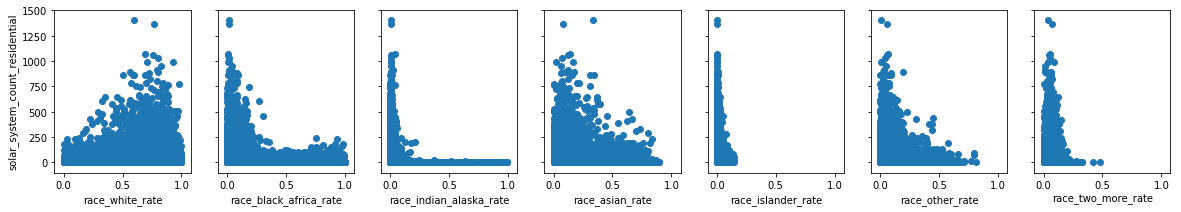

In [178]:
feats = ['race_white_rate',
'race_black_africa_rate',
'race_indian_alaska_rate',
'race_asian_rate',
'race_islander_rate',
'race_other_rate',
'race_two_more_rate']

f, ax = plt.subplots(1, len(feats), sharey=True, sharex = True, figsize = (20,3))
for ind, var in enumerate(feats):
#     ax.subplot(1,len(feats), ind+1)
    ax[ind].scatter(df[var], df['solar_system_count_residential'])
    ax[ind].set_xlabel(var)
ax[0].set_ylabel('solar_system_count_residential')

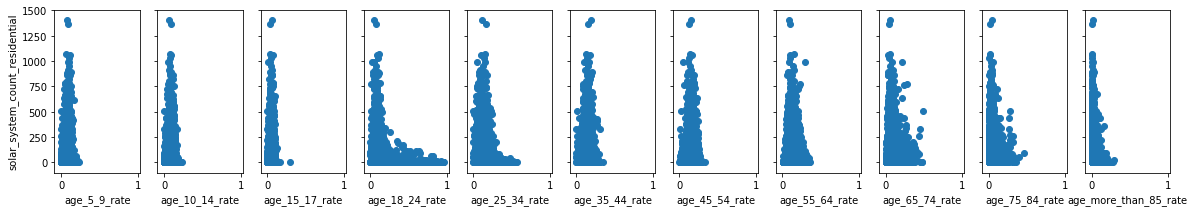

In [179]:
feats = ['age_5_9_rate',
'age_10_14_rate',
'age_15_17_rate','age_18_24_rate',
'age_25_34_rate',
'age_35_44_rate',
'age_45_54_rate','age_55_64_rate',
'age_65_74_rate', 'age_75_84_rate',
'age_more_than_85_rate',
]

f, ax = plt.subplots(1, len(feats), sharey=True, sharex = True, figsize = (20,3))
for ind, var in enumerate(feats):
#     ax.subplot(1,len(feats), ind+1)
    ax[ind].scatter(df[var], df['solar_system_count_residential'])
    ax[ind].set_xlabel(var)
ax[0].set_ylabel('solar_system_count_residential')

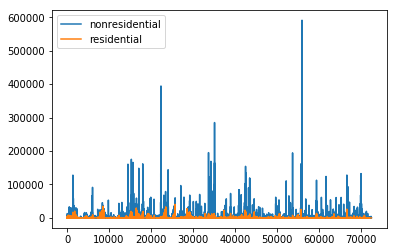

In [181]:
# df['total_panel_area_nonresidential'].plot()
# df['total_panel_area_residential'].plot()

plt.plot(df.index, df['total_panel_area_nonresidential'], label= 'nonresidential')
plt.plot(df.index, df['total_panel_area_residential'], label= 'residential')

plt.legend()

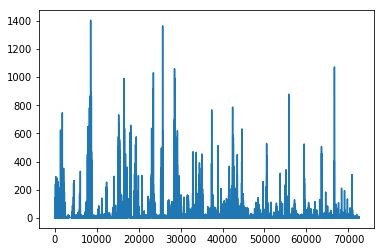

In [182]:
plt.plot(df.index, df['solar_system_count_residential'])

c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


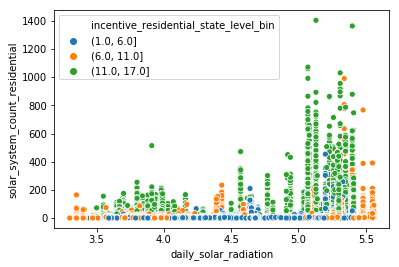

In [187]:
sns.scatterplot(df['daily_solar_radiation'], df[target], hue =df['incentive_residential_state_level_bin'])#df['incentive_residential_state_level'] )

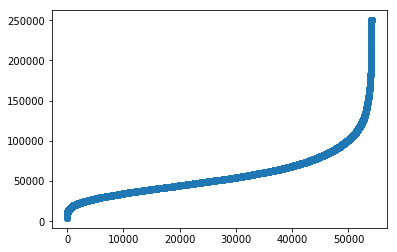

In [258]:
plt.scatter([n for n in range(len(df))], df.median_household_income.sort_values())



/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


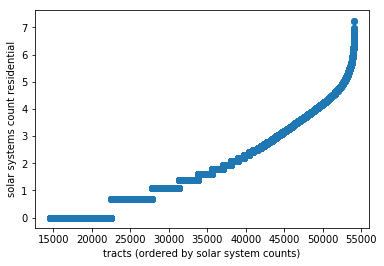

In [186]:
plt.scatter([n for n in range(len(df))], np.log(df.solar_system_count_residential.sort_values()))
plt.ylabel('solar systems count residential')
plt.xlabel('tracts (ordered by solar system counts)')

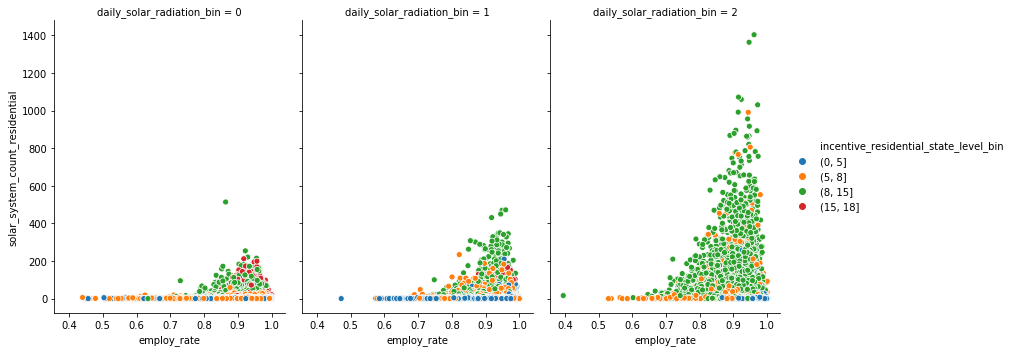

In [184]:
sns.relplot(x="employ_rate", y=target,
            hue="incentive_residential_state_level_bin", col="daily_solar_radiation_bin",
            size_order=["T1", "T2"],
            height=5, aspect=.75, facet_kws=dict(sharex=True),
            kind="scatter", legend="full", data=df)

In [ ]:

binned_var_omit = [col for col in df.columns if '_bin' in col]

omit = ['Unnamed: 0','total_panel_area', 'population_density_bin_equalwidth','population_density_bin_equaln','fips', 'county', 'state', 'electricity_price_transportation', 'total_panel_area_residential',
'total_panel_area_nonresidential',  'education_population','solar_panel_area_divided_by_area', 'solar_panel_area_per_capita',
        'tile_count','tile_count_residential', 'tile_count_nonresidential','number_of_solar_system_per_household', 'solar_system_count', 'solar_system_count_residential']

edu_omit = ['education_bachelor','education_college','education_doctoral','education_high_school_graduate','education_less_than_high_school','education_master','education_professional_school']
race_omit = ['race_asian','race_black_africa','race_indian_alaska','race_islander','race_other','race_two_more','race_white']
heat_fuel_omit = ['heating_fuel_coal_coke','heating_fuel_electricity','heating_fuel_fuel_oil_kerosene','heating_fuel_gas','heating_fuel_housing_unit_count',
'heating_fuel_none','heating_fuel_other','heating_fuel_solar']


edu_rate_omit = ['education_bachelor_rate','education_college_rate','education_doctoral_rate','education_high_school_graduate_rate','education_less_than_high_school_rate','education_master_rate','education_professional_school_rate']
race_rate_omit = ['race_asian_rate','race_black_africa_rate','race_indian_alaska_rate','race_islander_rate','race_other_rate','race_two_more_rate','race_white_rate']
heat_fuel_rate_omit = ['heating_fuel_coal_coke_rate','heating_fuel_electricity_rate','heating_fuel_fuel_oil_kerosene_rate','heating_fuel_gas_rate','heating_fuel_housing_unit_count_rate',
'heating_fuel_none_rate','heating_fuel_other_rate','heating_fuel_solar_rate']

regardless_omit = []#['heating_fuel_fuel_oil_kerosene_rate','heating_fuel_fuel_oil_kerosene','race_indian_alaska_rate','race_islander_rate', 'race_indian_alaska','race_islander']



In [169]:
features = ['median_household_income', 'population','race_white_rate', 'electricity_price_residential', 
           'electricity_consume_residential', 'household_count','housing_unit_median_value','occupancy_owner_rate',
           'mortgage_with_rate', 'age_35_44_rate', 'age_median','incentive_residential_state_level', 'voting_2016_dem_win']
target = 'solar_system_count_residential'#'total_panel_area'

# X = df.loc[:, ~(df.columns).isin([target]+ omit+regardless_omit+edu_omit+race_omit+heat_fuel_omit+binned_var_omit)]
# X = df.loc[:, ~(df.columns).isin([target]+ omit+edu_rate_omit+race_rate_omit+heat_fuel_rate_omit)]
X =df[features]
Y = df[target]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

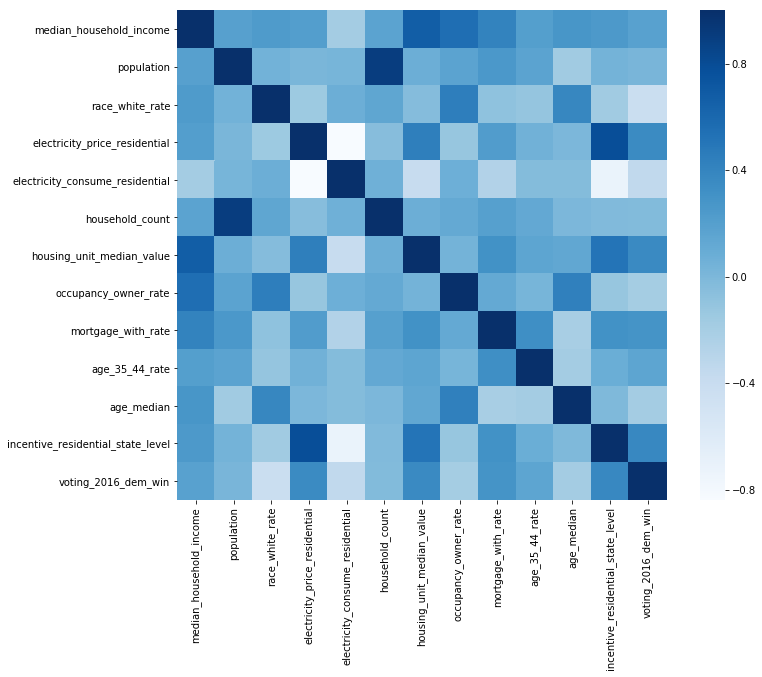

In [170]:
# corrmat = df[df.columns[0:60]].corr()#alt_X_df.corr()

corrmat = X.corr()
fig, ax = plt.subplots(1,1, figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True, annot=False,cmap='Blues')

## Linear Regression

In [131]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [132]:
pred = lin_reg.predict(X_test)

In [133]:
lin_reg.score(X_test, y_test)

0.70939117200149915

In [134]:
X.columns[lin_reg.coef_.argsort()]

Index(['total_area', 'voting_2012_dem_percentage',
       'voting_2012_gop_percentage', 'heating_fuel_other_rate',
       'heating_fuel_coal_coke_rate', 'heating_fuel_gas_rate',
       'heating_fuel_none_rate', 'heating_fuel_electricity_rate',
       'household_type_family_rate', 'travel_time_less_than_10_rate',
       ...
       'age_45_54_rate', 'age_55_64_rate', 'age_retired_rate',
       'transportation_motorcycle_rate', 'voting_2016_gop_percentage',
       'relative_humidity', 'voting_2016_dem_percentage',
       'heating_fuel_solar_rate', 'land_area', 'water_area'],
      dtype='object', length=132)

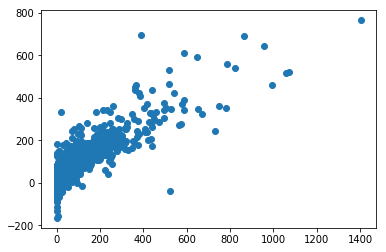

In [135]:
plt.scatter(y_test,pred)

In [136]:
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.65994417015167284

In [137]:
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.70401306274747011

## Support Vector Machines (Regression)

In [100]:
scaler = StandardScaler()
scaler.fit(X_train)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
from sklearn.svm import SVR
params = {'kernel' :'linear'}
svr = SVR(**params)
svr.fit(scaler.transform(X_train), y_train)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
preds = svr.predict(scaler.transform(X_test))
svr.score(scaler.transform(X_test), y_test)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  


0.45637167901002962

## Ensemble Methods

In [101]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
clf.score(X_test, y_test)

0.76989257352532736

MSE: 2428.8544


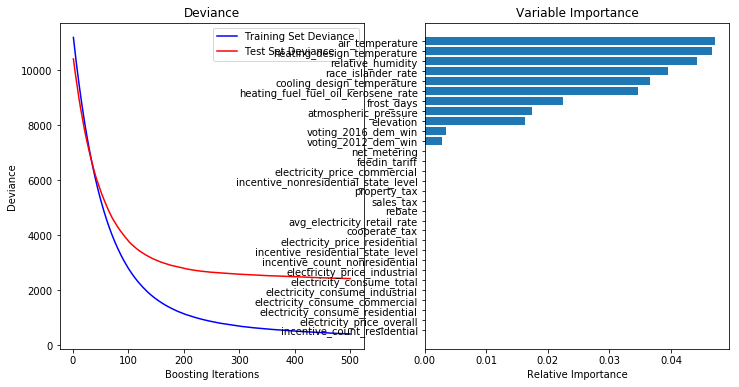

In [103]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[:30], feature_importance[sorted_idx][:30], align='center')
plt.yticks(pos[:30], X_test.columns[sorted_idx][:30])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

In [ ]:
# Test model performance